In [27]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

def extractData(filename):
    raw_data = np.load(filename)
    return raw_data['arr_0'][0]

In [28]:
# data_signalFreq_sampleRate

data_400khz_1300khz = extractData('ugastro\\lab_1_data_400khz_1300khz.npz')
data_400khz_2000khz = extractData('ugastro\\lab_1_data_400khz_2000khz.npz')
data_400khz_3100khz = extractData('ugastro\\lab_1_data_400khz_3100khz.npz')
data_1500khz_1300khz = extractData('ugastro\\lab_1_data_1500khz_1300khz.npz')
data_1500khz_2000khz = extractData('ugastro\\lab_1_data_1500khz_2000khz.npz')
data_1500khz_3100khz = extractData('ugastro\\lab_1_data_1500khz_3100khz.npz')

indices = [i for i in range(1900, 2048)]

In [29]:
def removeBuffer(data):
    return data[1900:]

data_400khz_1300khz = removeBuffer(data_400khz_1300khz)
data_400khz_2000khz = removeBuffer(data_400khz_2000khz)
data_400khz_3100khz = removeBuffer(data_400khz_3100khz)
data_1500khz_1300khz = removeBuffer(data_1500khz_1300khz)
data_1500khz_2000khz = removeBuffer(data_1500khz_2000khz)
data_1500khz_3100khz = removeBuffer(data_1500khz_3100khz)

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=indices,
    y=data_400khz_3100khz,
    mode='lines+markers',
    name="3.1 MHz Sample Rate",
    marker=dict(size=5)
))

fig.add_trace(go.Scatter(
    x=indices,
    y=data_400khz_2000khz,
    mode='lines+markers',
    name="2 MHz Sample Rate",
    marker=dict(size=5)
))

fig.add_trace(go.Scatter(
    x=indices,
    y=data_400khz_1300khz,
    mode='lines+markers',
    name="1.3 MHz Sample Rate",
    marker=dict(size=5)
))

fig.update_layout(
    title="Analysis of 400 kHz Signal with Different Sample Rates",
    xaxis_title="Time / Samples",
    yaxis_title="Measured Voltage",
    legend_title="Sample Rates",
    template="plotly_white"
)

fig.show()

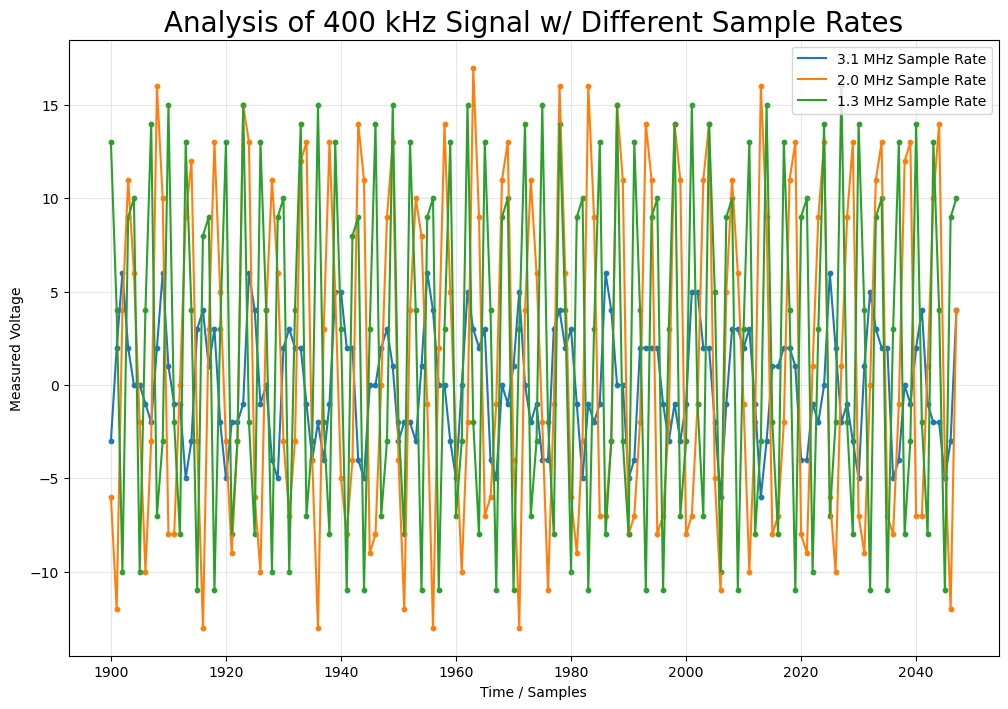

In [31]:
plt.figure(figsize=(12,8))
plt.plot(indices, data_400khz_3100khz, label="3.1 MHz Sample Rate", alpha=1)
plt.plot(indices, data_400khz_2000khz, label="2.0 MHz Sample Rate", alpha=1)
plt.plot(indices, data_400khz_1300khz, label="1.3 MHz Sample Rate", alpha=1)
plt.scatter(indices, data_400khz_3100khz, s=10, alpha=1)
plt.scatter(indices, data_400khz_2000khz, s=10, alpha=1)
plt.scatter(indices, data_400khz_1300khz, s=10, alpha=1)

plt.xlabel("Time / Samples")
plt.ylabel("Measured Voltage")
plt.title("Analysis of 400 kHz Signal w/ Different Sample Rates", size=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

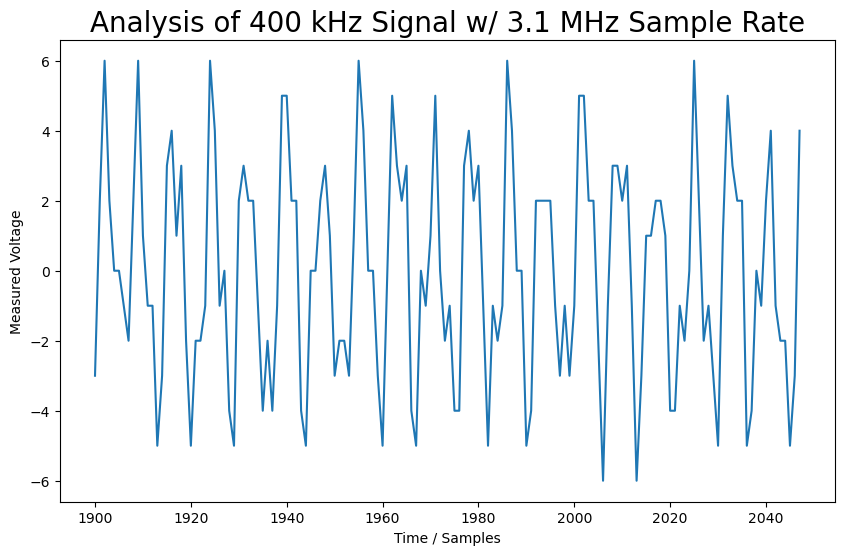

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(indices, data_400khz_3100khz)
plt.xlabel("Time / Samples")
plt.ylabel("Measured Voltage")
plt.title("Analysis of 400 kHz Signal w/ 3.1 MHz Sample Rate", size=20)
plt.show()

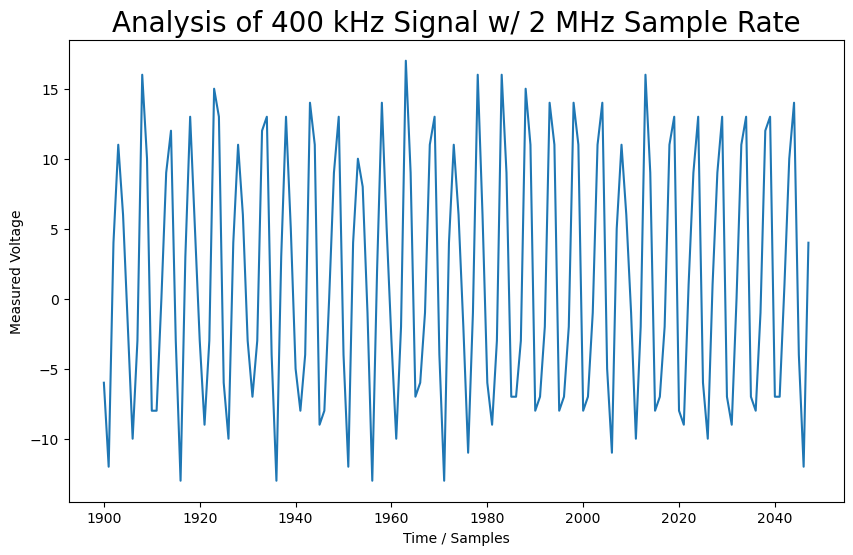

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(indices, data_400khz_2000khz)
plt.xlabel("Time / Samples")
plt.ylabel("Measured Voltage")
plt.title("Analysis of 400 kHz Signal w/ 2 MHz Sample Rate", size=20)
plt.show()

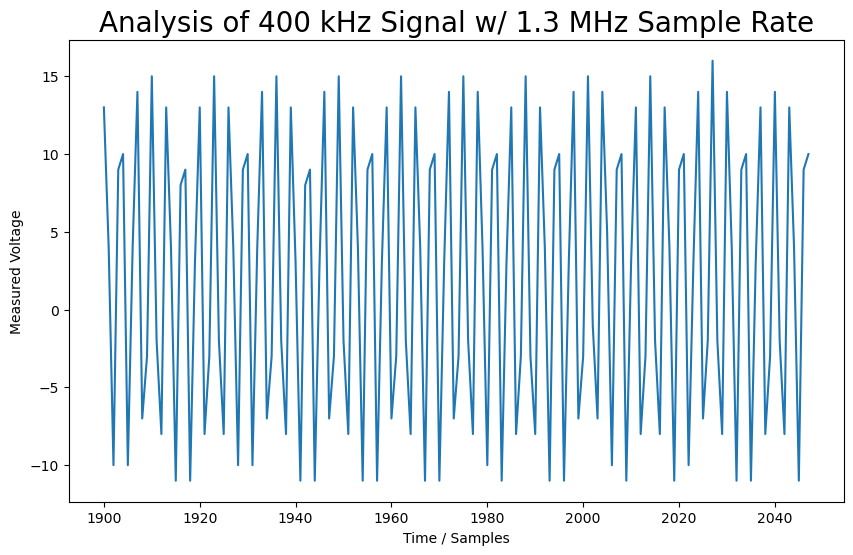

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(indices, data_400khz_1300khz)
plt.xlabel("Time / Samples")
plt.ylabel("Measured Voltage")
plt.title("Analysis of 400 kHz Signal w/ 1.3 MHz Sample Rate", size=20)
plt.show()

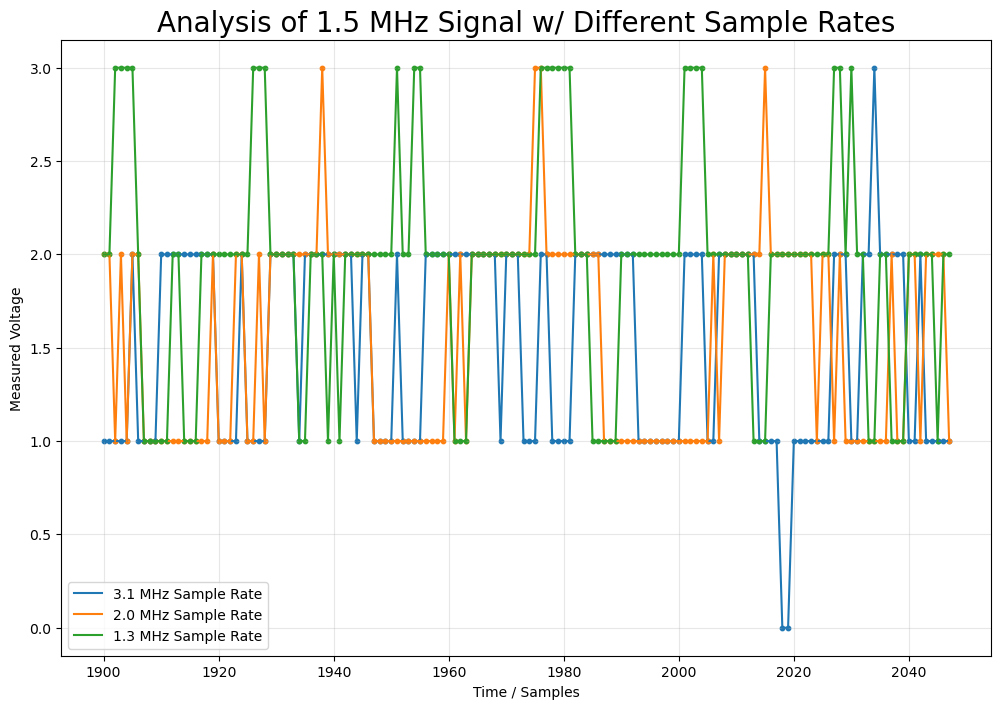

In [35]:
plt.figure(figsize=(12,8))
plt.plot(indices, data_1500khz_3100khz, label="3.1 MHz Sample Rate", alpha=1)
plt.plot(indices, data_1500khz_2000khz, label="2.0 MHz Sample Rate", alpha=1)
plt.plot(indices, data_1500khz_1300khz, label="1.3 MHz Sample Rate", alpha=1)
plt.scatter(indices, data_1500khz_3100khz, s=10, alpha=1)
plt.scatter(indices, data_1500khz_2000khz, s=10, alpha=1)
plt.scatter(indices, data_1500khz_1300khz, s=10, alpha=1)

plt.xlabel("Time / Samples")
plt.ylabel("Measured Voltage")
plt.title("Analysis of 1.5 MHz Signal w/ Different Sample Rates", size=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

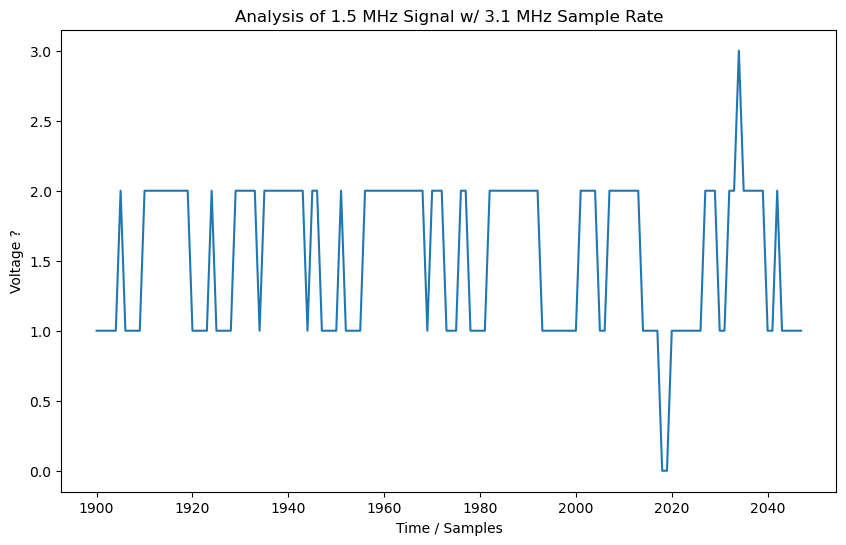

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(indices, data_1500khz_3100khz)
plt.xlabel("Time / Samples")
plt.ylabel("Voltage ?")
plt.title("Analysis of 1.5 MHz Signal w/ 3.1 MHz Sample Rate")
plt.show()

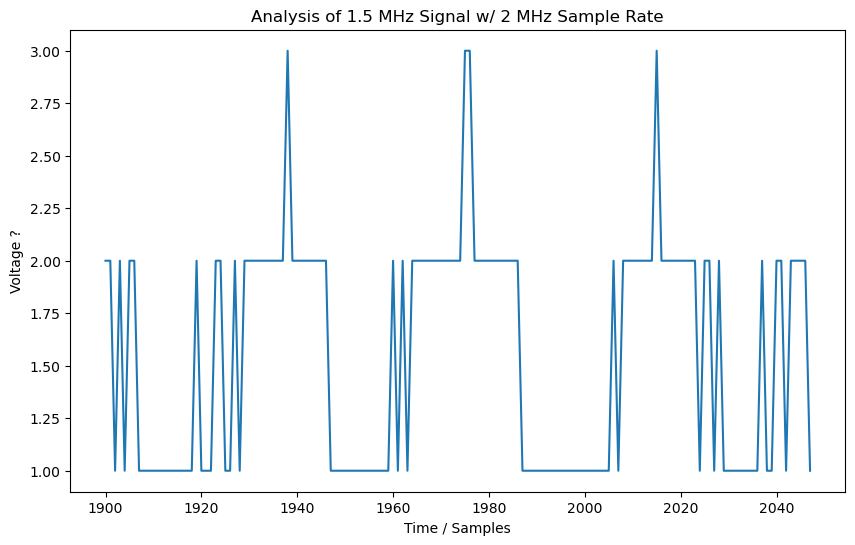

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(indices, data_1500khz_2000khz)
plt.xlabel("Time / Samples")
plt.ylabel("Voltage ?")
plt.title("Analysis of 1.5 MHz Signal w/ 2 MHz Sample Rate")
plt.show()

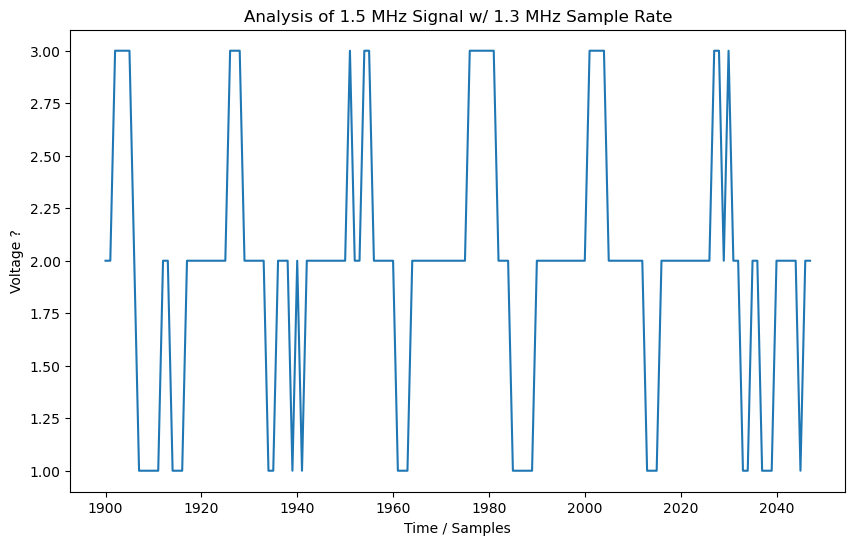

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(indices, data_1500khz_1300khz)
plt.xlabel("Time / Samples")
plt.ylabel("Voltage ?")
plt.title("Analysis of 1.5 MHz Signal w/ 1.3 MHz Sample Rate")
plt.show()

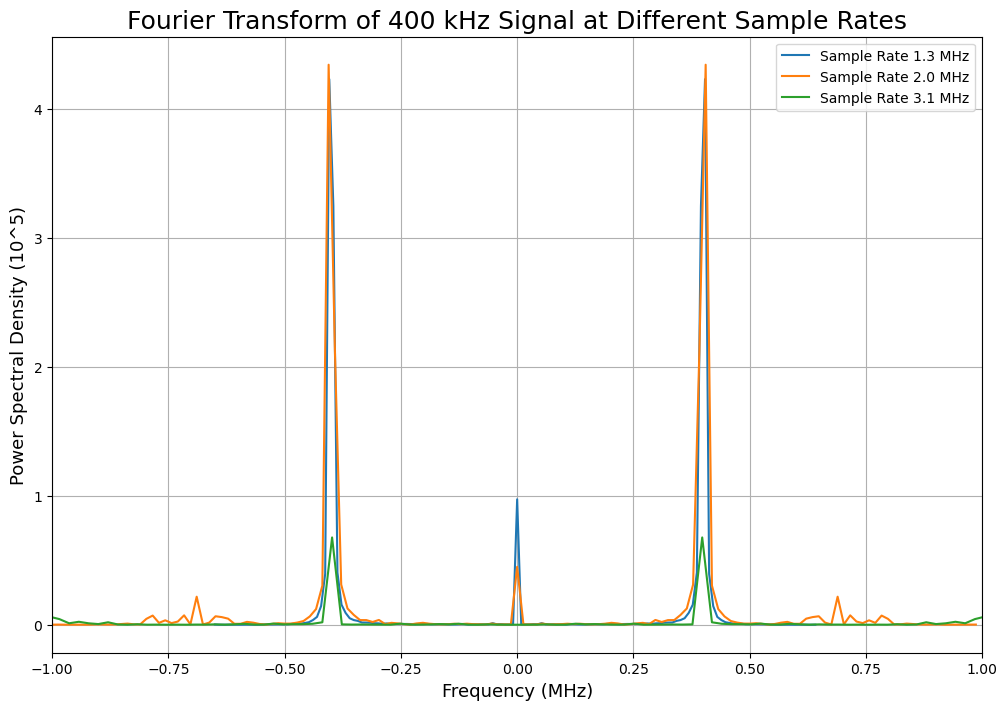

In [47]:
datasets = [data_400khz_1300khz, data_400khz_2000khz, data_400khz_3100khz]
sample_rates = [1.3e6, 2.0e6, 3.1e6]
sample_rate_titles = ["1.3 MHz", "2.0 MHz", "3.1 MHz"]
N = len(indices)

plt.figure(figsize=(12, 8))

for i, data in enumerate(datasets):
    fft_data = fft(data)
    fft_data_shifted = fftshift(fft_data)
    freq_bins = fftshift(fftfreq(N, d=1/sample_rates[i]))

    power_spectrum = abs(fft_data_shifted) ** 2

    plt.plot(freq_bins / 1e6, power_spectrum / 1e5, label=f"Sample Rate {sample_rate_titles[i]}")

plt.xlabel("Frequency (MHz)", size=13)
plt.xlim((-1, 1))
plt.ylabel("Power Spectral Density (10^5)", size=13)
plt.title("Fourier Transform of 400 kHz Signal at Different Sample Rates", size=18)
plt.legend()
plt.grid(True)
plt.show()



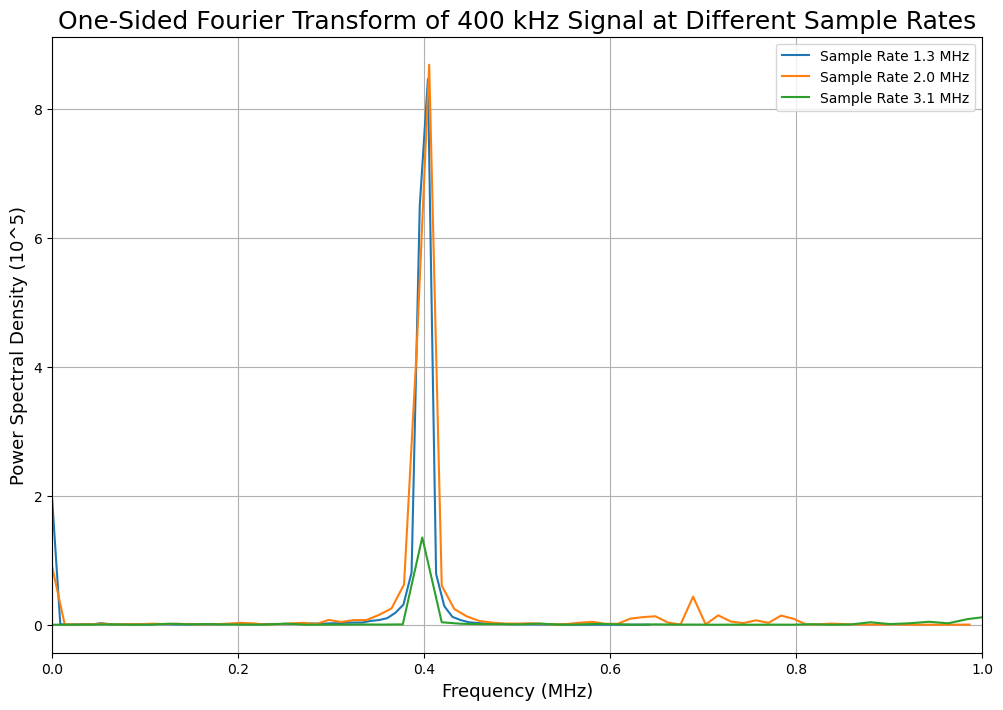

In [46]:
datasets = [data_400khz_1300khz, data_400khz_2000khz, data_400khz_3100khz]
sample_rates = [1.3e6, 2.0e6, 3.1e6]
sample_rate_titles = ["1.3 MHz", "2.0 MHz", "3.1 MHz"]
N = len(indices)
mid = N // 2

plt.figure(figsize=(12, 8))

for i, data in enumerate(datasets):
    fft_data = fft(data)
    fft_data_shifted = fftshift(fft_data)[mid:]
    freq_bins = fftshift(fftfreq(N, d=1/sample_rates[i]))[mid:]

    power_spectrum = 2 * (abs(fft_data_shifted) ** 2)

    plt.plot(freq_bins / 1e6, power_spectrum / 1e5, label=f"Sample Rate {sample_rate_titles[i]}")

plt.xlabel("Frequency (MHz)", size=13)
plt.xlim((0, 1))
plt.ylabel("Power Spectral Density (10^5)", size=13)
plt.title("One-Sided Fourier Transform of 400 kHz Signal at Different Sample Rates", size=18)
plt.legend()
plt.grid(True)
plt.show()

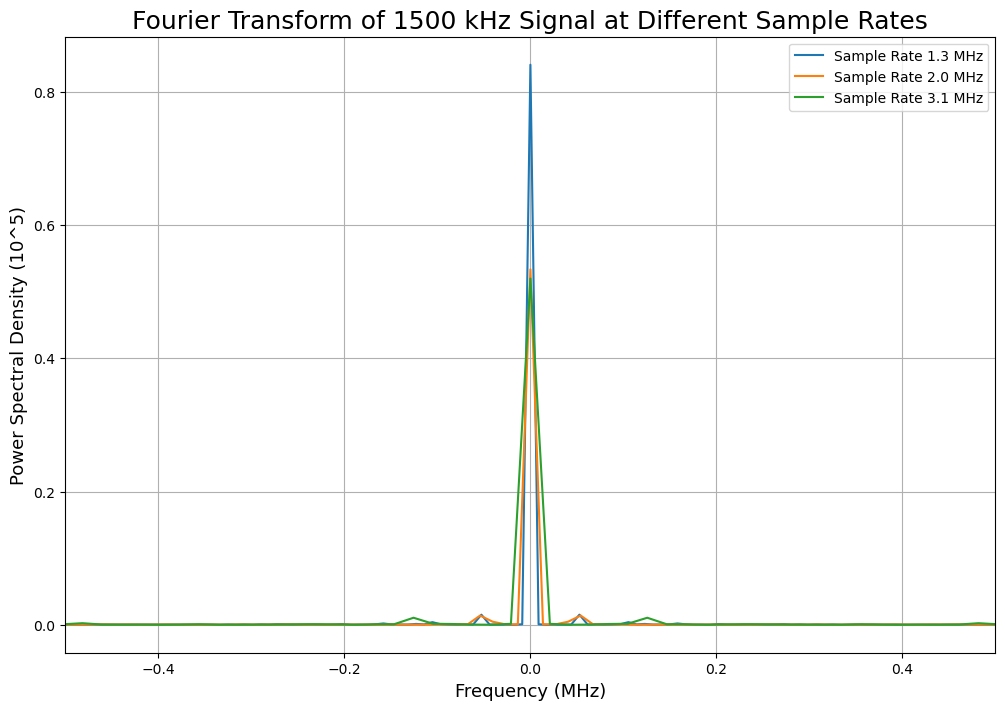

In [49]:
datasets = [data_1500khz_1300khz, data_1500khz_2000khz, data_1500khz_3100khz]
sample_rates = [1.3e6, 2.0e6, 3.1e6]
sample_rate_titles = ["1.3 MHz", "2.0 MHz", "3.1 MHz"]
N = len(indices)

plt.figure(figsize=(12, 8))

for i, data in enumerate(datasets):
    fft_data = fft(data)
    fft_data_shifted = fftshift(fft_data)
    freq_bins = fftshift(fftfreq(N, d=1/sample_rates[i]))

    power_spectrum = abs(fft_data_shifted) ** 2

    plt.plot(freq_bins / 1e6, power_spectrum / 1e5, label=f"Sample Rate {sample_rate_titles[i]}")

plt.xlabel("Frequency (MHz)", size=13)
plt.xlim((-0.3, 0.3))
plt.ylabel("Power Spectral Density (10^5)", size=13)
plt.title("Fourier Transform of 1500 kHz Signal at Different Sample Rates", size=18)
plt.legend()
plt.grid(True)
plt.show()